In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
df = pd.read_csv('divvy_trip_history_201909-202108.csv',
                 low_memory=False)

In [3]:
df.shape

(8317280, 21)

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', '...1', 'ride_id', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'member_casual', 'date', 'month', 'day', 'year',
       'day_of_week'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,ID,...1,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,...,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
0,1,1147482,8267501.0,24710636,docked_bike,2019-09-01 00:00:15,2019-09-01 00:05:00,Southport Ave & Waveland Ave,227,Ashland Ave & Belle Plaine Ave,...,41.9482,-87.6639,41.9561,-87.6688,member,2019-09-01,9,1,2019,Sunday
1,2,1147483,8267502.0,24710637,docked_bike,2019-09-01 00:00:48,2019-09-01 00:06:46,Wells St & Concord Ln,289,Sedgwick St & Webster Ave,...,41.9121,-87.6347,41.9222,-87.6389,member,2019-09-01,9,1,2019,Sunday
2,3,1147484,8267503.0,24710638,docked_bike,2019-09-01 00:01:13,2019-09-01 00:07:53,Broadway & Waveland Ave,304,Broadway & Belmont Ave,...,41.9491,-87.6486,41.9401,-87.6455,member,2019-09-01,9,1,2019,Sunday
3,4,1147485,8267504.0,24710639,docked_bike,2019-09-01 00:01:34,2019-09-01 00:11:04,Wells St & Concord Ln,289,Clark St & Drummond Pl,...,41.9121,-87.6347,41.9312,-87.6443,member,2019-09-01,9,1,2019,Sunday
4,5,1147486,8267505.0,24710640,docked_bike,2019-09-01 00:03:29,2019-09-01 00:21:53,Wells St & Concord Ln,289,Western Ave & Walton St,...,41.9121,-87.6347,41.8984,-87.6866,member,2019-09-01,9,1,2019,Sunday


In [6]:
condlist = [df['month']==1,df['month']==2,df['month']==3,
            df['month']==4,df['month']==5,df['month']==6,
            df['month']==7,df['month']==8,df['month']==9,
            df['month']==10,df['month']==11,df['month']==12]

choicelist = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

df['month_name'] = np.select(condlist, choicelist) 

<AxesSubplot:xlabel='start_station_name', ylabel='month_year'>

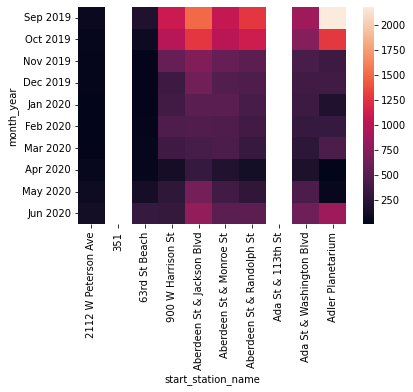

In [7]:
# 10 x 10 heat map using seaborn
df['month_year'] = df['month_name'].astype(str) + " " \
                    + df['year'].astype(str)
# might be able to use.pivot here instead of unstack
rides_streets = df.groupby(['month_year','start_station_name'],#as_index=False
                       )['ride_id'].count().unstack()

# index is apr 2020, apr 2021, Aug 2020, Aug 2021
# need to sort it so it is in chrono order
# create the order to be sorted in 
months_2019 = [x + ' 2019' for x in choicelist]
months_2020 = [x + ' 2020' for x in choicelist]
months_2021 = [x + ' 2021' for x in choicelist]

months_years_orderd = months_2019 + months_2020 + months_2021

# sort index based on list, make index a col, make col category and indicate order,
# sort values of new col, drop new col b/c not needed anymore 
rides_streets['ind'] = rides_streets.index
rides_streets['ind'] = pd.Categorical(rides_streets['ind'],
                                     months_years_orderd)
rides_streets.sort_values('ind',inplace=True)
rides_streets.drop('ind',axis=1,inplace=True)

sns.heatmap(rides_streets.iloc[:10,:10])

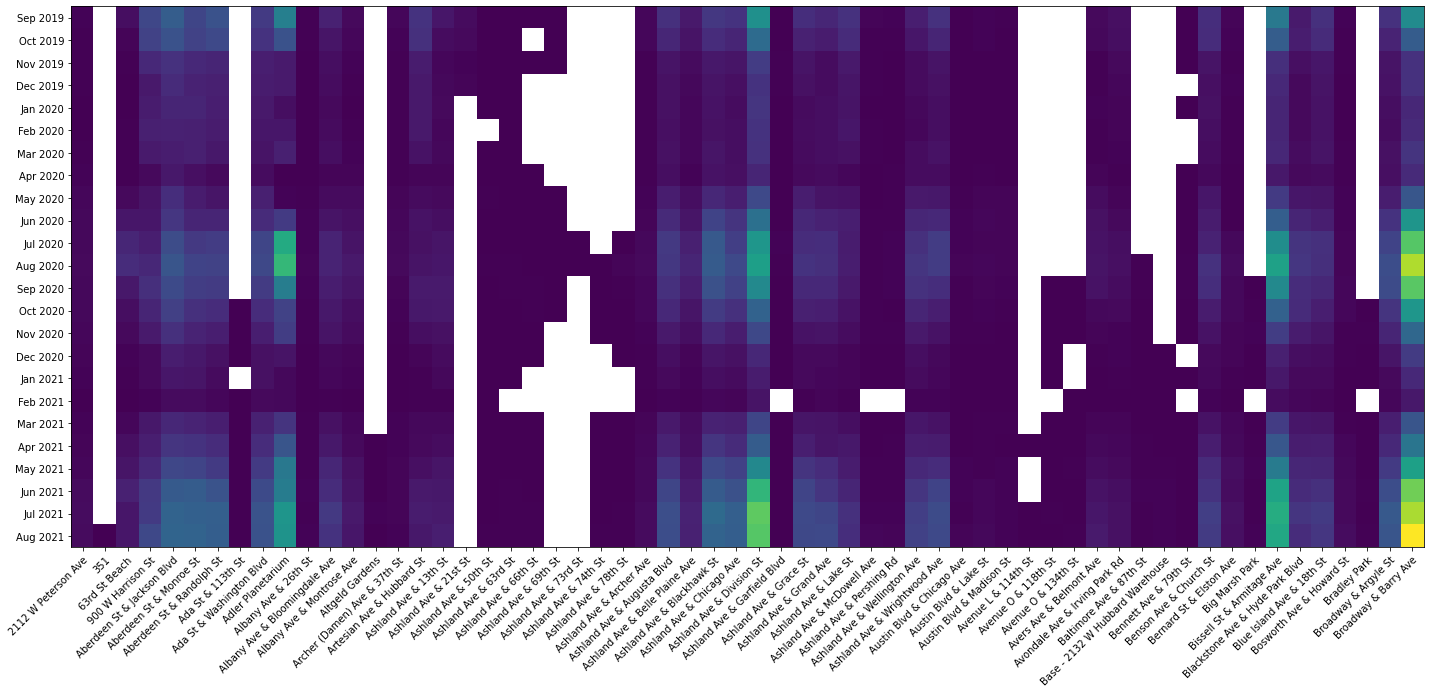

In [8]:
# all months & 60 Divvy stations
data = rides_streets.iloc[:24,:60]

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(data)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(data.columns)), labels=data.columns)
ax.set_yticks(np.arange(len(data.index)), labels=data.index)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

In [9]:
# functino to create heat map
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

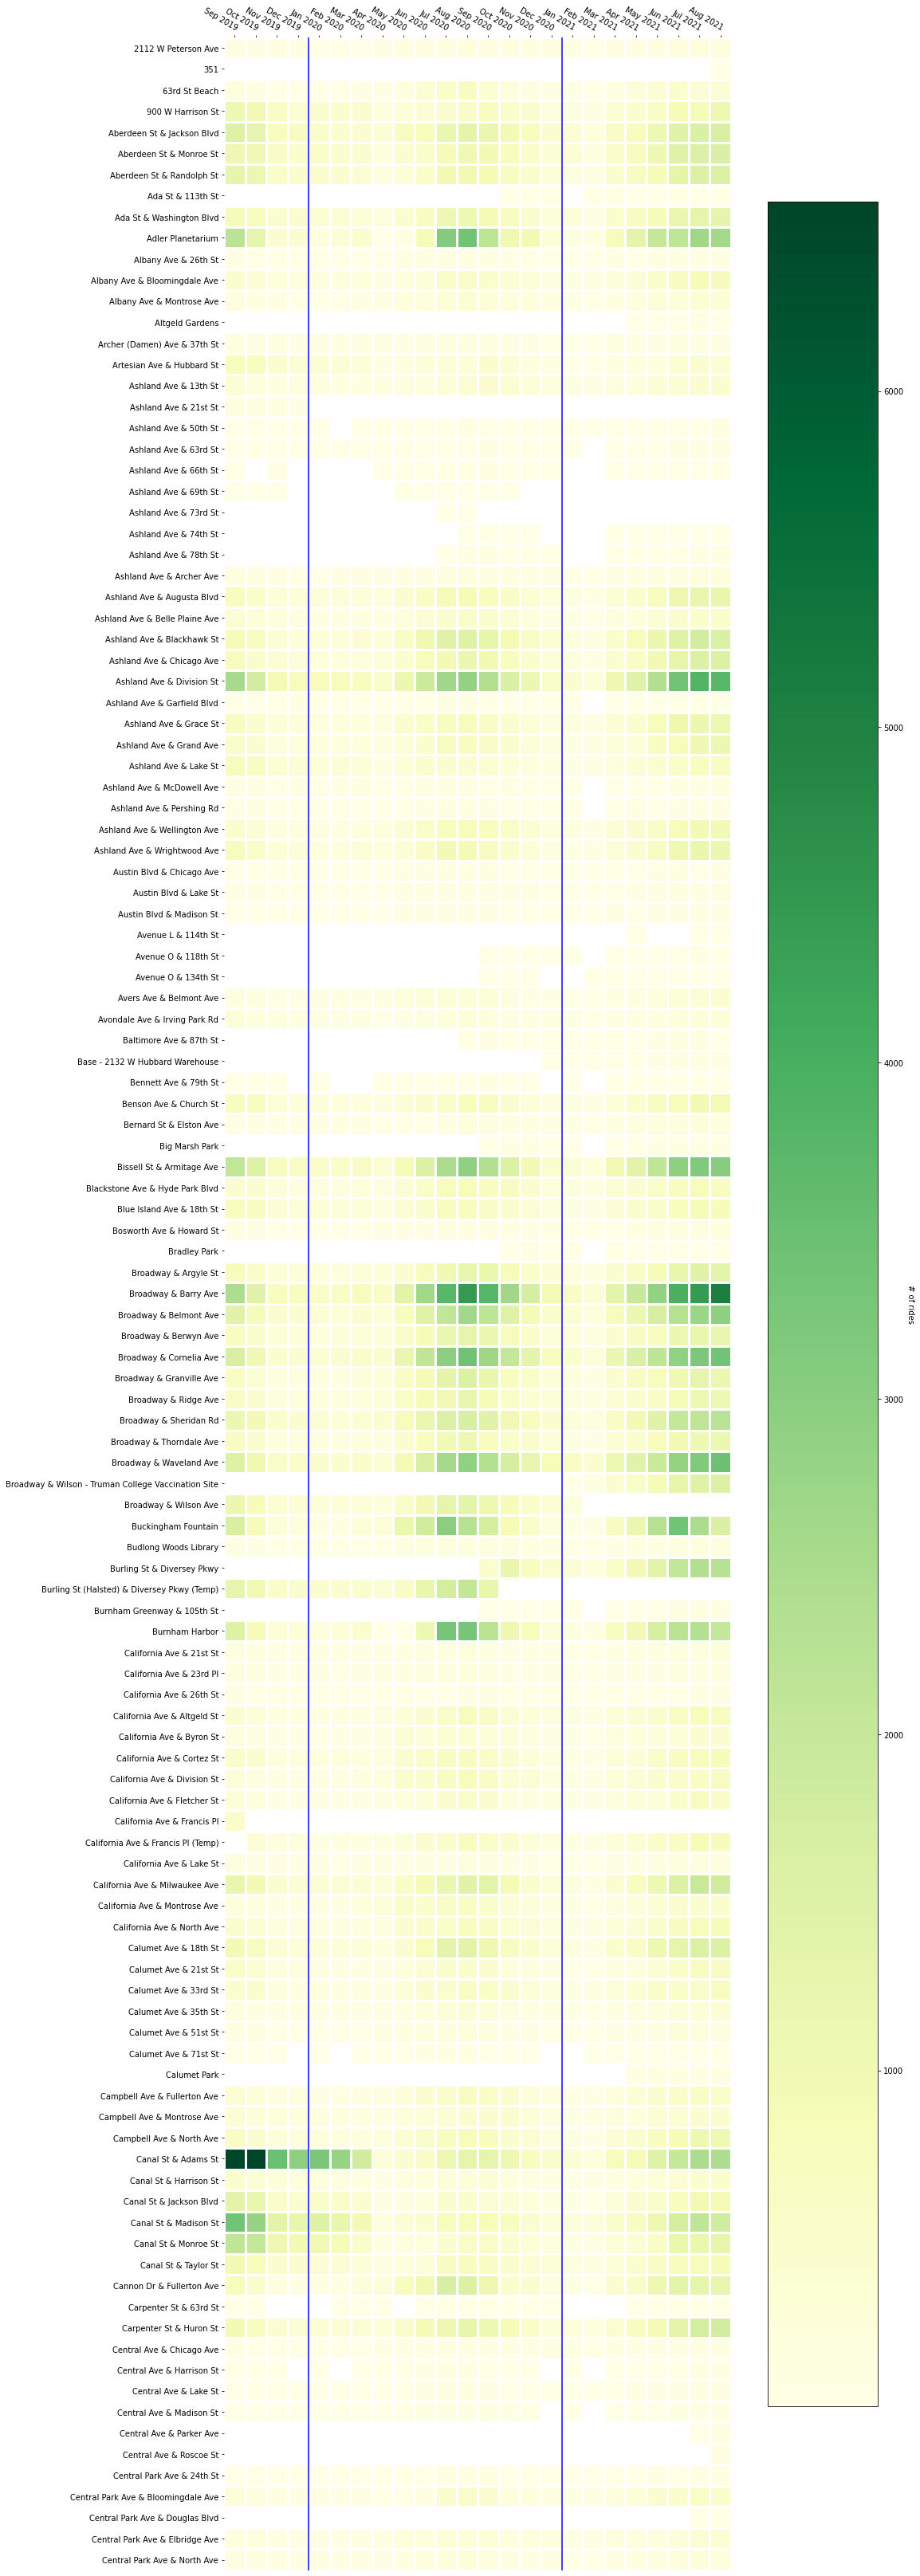

In [10]:
# create heat map with all streets all dates using matplotlib
# add lines at start of each new year
data = rides_streets.T.iloc[:120,:24]

x_axis_data = data.index
y_axis_data = data.columns

# this relies on above
fig, ax = plt.subplots(figsize=(15,45))

im, cbar = heatmap(data, x_axis_data, y_axis_data, ax=ax,
                   cmap="YlGn", cbarlabel="# of rides")

plt.axvline(x = 3.5, color = 'b',)
plt.axvline(x = 15.5, color = 'b',)

fig.tight_layout()
plt.show()

<AxesSubplot:ylabel='start_station_name'>

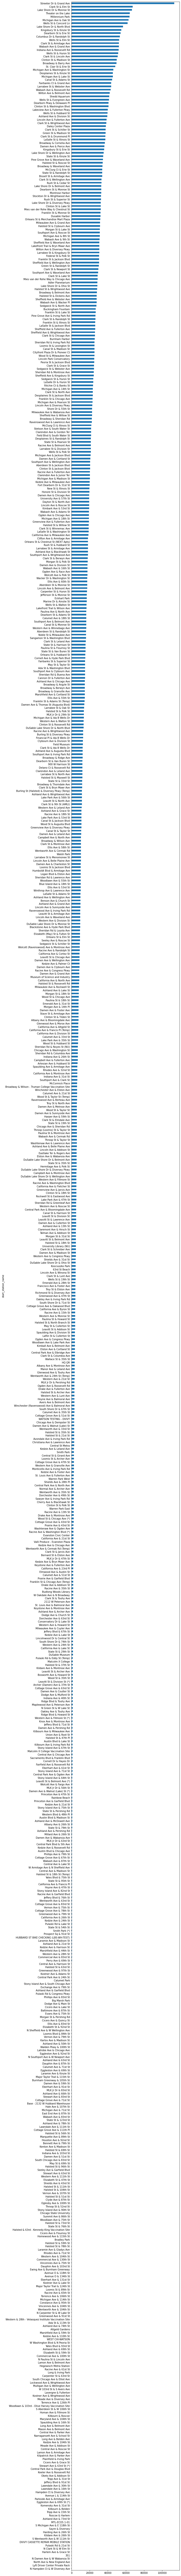

In [11]:
# Bar graph of total rides from each Divvy Station
df.groupby('start_station_name')['ride_id'].count().sort_values().plot(kind='barh',figsize=(8,195))                         